**Valkyrie Science Technical Assessment**

**Part 1**

1). I have chosen the "Good Food, Bad Food" dataset from the CDC, and loaded it below, along with the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

original_df = pd.read_csv('NationalOutbreak_OutbreakData.csv')

2). For basic Exploratory Data Analysis, my goal is not to modify the original dataset or answer a particular question, but only to better understand the characteristics and distribution of the data set itself.  
The loaded dataset describes a set of foodborne illness outbreaks that occured over a period of 20 years originating in the United States and associated territories.  

First, I'll start with some basic descriptive information and general statistics:

In [4]:
original_df.describe()

,Year,Month,Illnesses,Hospitalizations,Info on Hospitalizations,Deaths,Info on Deaths
count,46024.000000,46024.000000,46024.000000,39593.00000,29808.000000,39666.000000,29869.000000
mean,2010.304080,5.771684,25.594907,0.78572,22.218398,0.037160,23.343333
std,5.532413,3.781465,45.506304,3.85394,36.499855,0.338661,37.347062
min,1998.000000,1.000000,2.000000,0.00000,0.000000,0.000000,0.000000
25%,2007.000000,2.000000,5.000000,0.00000,4.000000,0.000000,4.000000
50%,2012.000000,5.000000,14.000000,0.00000,12.000000,0.000000,13.000000
75%,2015.000000,9.000000,31.000000,1.00000,29.000000,0.000000,30.000000
max,2017.000000,12.000000,2500.000000,308.00000,2500.000000,33.000000,2500.000000


In [5]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46024 entries, 0 to 46023
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Year                          46024 non-null  int64  
 1   Month                         46024 non-null  int64  
 2   State                         46024 non-null  object 
 3   Primary Mode                  46024 non-null  object 
 4   Etiology                      33060 non-null  object 
 5   Serotype or Genotype          11217 non-null  object 
 6   Etiology Status               33060 non-null  object 
 7   Setting                       39940 non-null  object 
 8   Illnesses                     46024 non-null  int64  
 9   Hospitalizations              39593 non-null  float64
 10  Info on Hospitalizations      29808 non-null  float64
 11  Deaths                        39666 non-null  float64
 12  Info on Deaths                29869 non-null  float64
 13  F

This dataset consists of 21 columns and 46,024 rows of data, including 7 columns of numerical data (int64 and float64) and 14 columns of object data.

The data was collected for outbreaks between 1998 and 2017

Additionally, some columns do not contain any null data values, while others are nearly entirely null.  The distribuiton of null and non-null data for each column can be visualized by the following:

<Axes: >

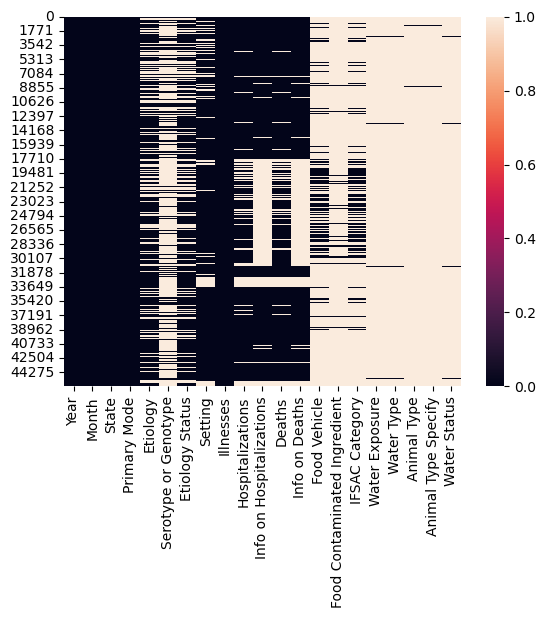

In [6]:
sns.heatmap(original_df.isnull())

In the above figure, the dataset column titles are displayed on the x axis and the row indices are displayed on the y axis.  The value at a given row/column pair indicates whether or not the contained data is a null value.  

From this visualization, it is clear that several columns (Year, Month, State, Primary Mode, and Illnesses) are completely non-null, while others contain either partially or nearly entirely null data.  In particular, the last 8 columns shown in the figure are nearly empty of meaningful data, limiting their usefulness in further analysis.

For a few columns, the number of null values is low enough for the column to possibly still provide meaningful information.  For example, the Setting, Deaths, and Hospitalization columns have a relativlely low number of null values, expressed as a percentage below:  

In [239]:
total_len = len(original_df)

print("Percentage of null values in 'Setting' column:", round((original_df['Setting'].isnull().sum()/total_len*100),2))

print("Percentage of null values in 'Deaths' column:", round((original_df['Deaths'].isnull().sum()/total_len*100),2))

print("Percentage of null values in 'Hospitalizations' column:", round((original_df['Hospitalizations'].isnull().sum()/total_len*100),2))

Percentage of null values in 'Setting' column: 13.22
Percentage of null values in 'Deaths' column: 13.81
Percentage of null values in 'Hospitalizations' column: 13.97


Therefore, the null values may be filled or removed while over 85% of the original information can be preserved for these columns.

For an anaysis of disease outbreaks, a critical value to track would be the number of illnesses per outbreak in a given year and how it changes over time.  The median number of illnesses per outbreak per year is visualized below from 1998-2017.

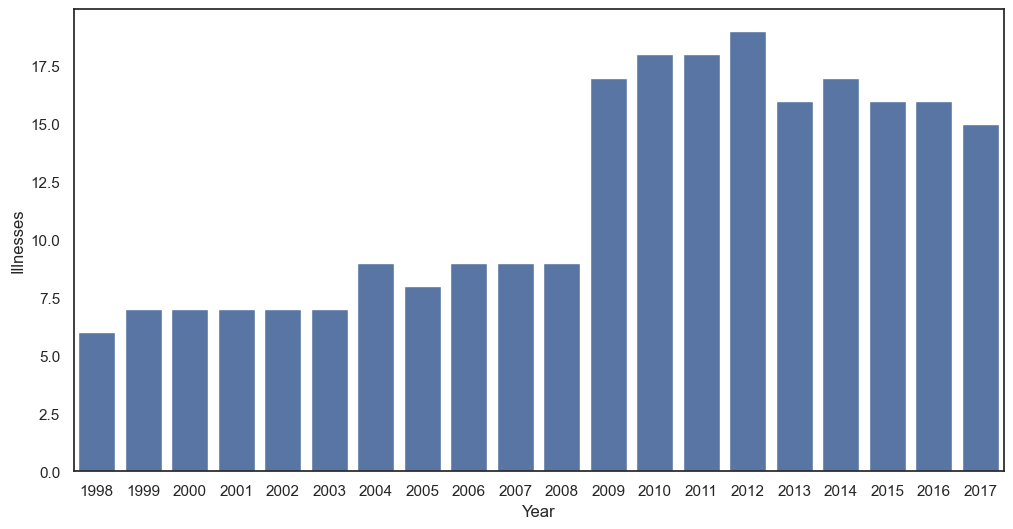

In [372]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=original_df.groupby(['Year']).median(numeric_only=True)['Illnesses'])
plt.show()

At first glance, there appears to be a significant increase in total number of illnesses caused by foodborne disease starting in 2009.  However, a closer look at the NORS data set description indicates that starting in 2009, outbreaks associated with modes of transmission other than food and water began to be recorded, as well as outbreaks that involved multiple states.  This likely explains why there was such a sharp increase in median illnesses recorded starting in 2009.  Any analysis of this data set should consider these changes in data collection methods before drawing conclusions.

Changes in the number of illnesses per outbreak could occur annually, but a seasonal change could exist as well.  To investigate this, I created a similar barplot counting the median number of foodborne illnesses per outbreak occuring in each month.

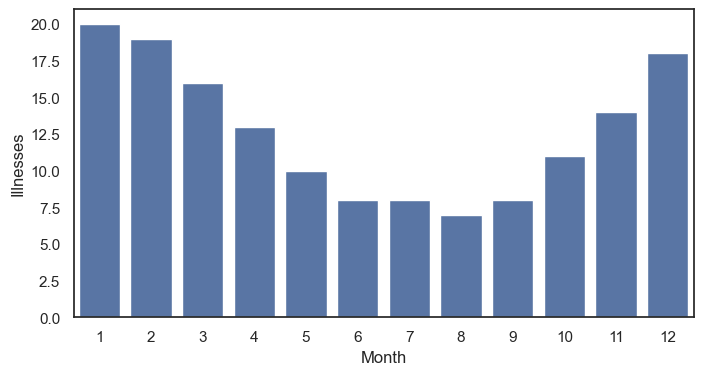

In [371]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=original_df.groupby(['Month']).median(numeric_only=True)['Illnesses'])
plt.show()

Interestingly, the median number of illnesses due to foodborne illnesses changes significantly depending on the month, with fall and winter generally producing a much higher number of illnesses than spring and summer.  This finding may prove useful later in the project.

In addition to the number of illnesses recorded during an outbreak, the number of hospitalizations and deaths could also be useful metrics for assessing the severity of an outbreak.  However, correlations between these three metrics should be examined before treating illnesses, hospitalizations, and deaths as independent variables during an outbreak.  

In [39]:
original_df[['Illnesses', 'Hospitalizations', 'Deaths']].corr()

,Illnesses,Hospitalizations,Deaths
Illnesses,1.000000,0.323250,0.092446
Hospitalizations,0.323250,1.000000,0.333718
Deaths,0.092446,0.333718,1.000000


With correlations between illnesses and hospitalizations and hospitalizations and deaths of 0.32 and 0.33, respectively, hospitalizations cannot be treated as an independent variable relative to illnesses and deaths.  The correlation between illnesses and deaths, however, is much lower at 0.09, meaning they are nearly independent.  

Next, I examined the shape of the distribution of illnesses in this data set in a histogram.

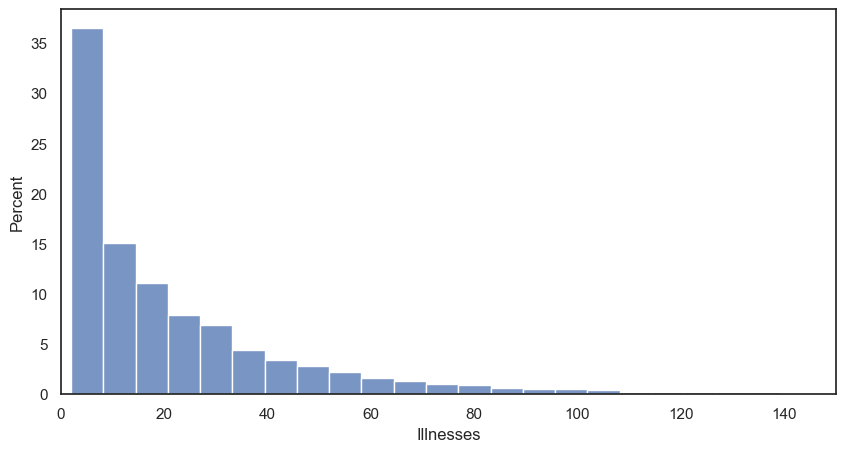

In [145]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.xlim(0, 150)
sns.histplot(data=original_df, x=original_df['Illnesses'], bins=400, stat='percent')
plt.show()

The distribution of Illnesses is smooth and asymptotic, with the number of illnesses per outbreak is less than 20 for a majority of outbreaks.

A similiar visualization of the deaths per outbreak is not as useful, as the percentage of outbreaks with a non-zero number of deaths is ~2%.

In [54]:
(len(original_df[original_df['Deaths']>0])/len(original_df))*100

2.2031983313054058

Lastly, I explored the Setting and Primary Mode columns to better understand the data contained within those columns

In [63]:
original_df['Setting'].nunique()

302

In [64]:
original_df['Setting'].value_counts()

Setting
Long-term care/nursing home/assisted living facility                                                                                      12672
Restaurant - other or unknown type                                                                                                         8179
Restaurant - Sit-down dining                                                                                                               2975
School/college/university                                                                                                                  2508
Private home/residence                                                                                                                     2294
                                                                                                                                          ...  
School/college/university; Religious facility                                                                                   

In [72]:
original_df['Setting'].str.startswith('Restaurant').sum()

13123

Data is the Setting column consists of 302 different possible settings, while outbreaks occured most commonly in either Long-term care/nursing home/assisted living facilities or in some form of restaurant.  It should be noted that several forms of restaurant are recorded as separate settings. As shown below, all outbreaks from long-term care settings and restaurants combined are ~ 65% of all outbreaks for which setting data is present, providing a clue to common locations for foodborne illness disease.  

In [83]:
total_num_settings = len(original_df['Setting'])
num_null_settings = original_df['Setting'].isnull().sum()
combined_settings = len(original_df[(original_df['Setting']=='Long-term care/nursing home/assisted living facility') | (original_df['Setting'].str.startswith('Restaurant'))])

In [85]:
print('Percent of outbreaks in long-term care facilities or restaurants:')
round(combined_settings/(total_num_settings-num_null_settings)*100, 1)

Percent of outbreaks in long-term care facilities or restaurants:


64.6

The last portion of exploratory data analysis for this project is to investigate the "Primary Mode" column.

In [90]:
original_df['Primary Mode'].nunique()

6

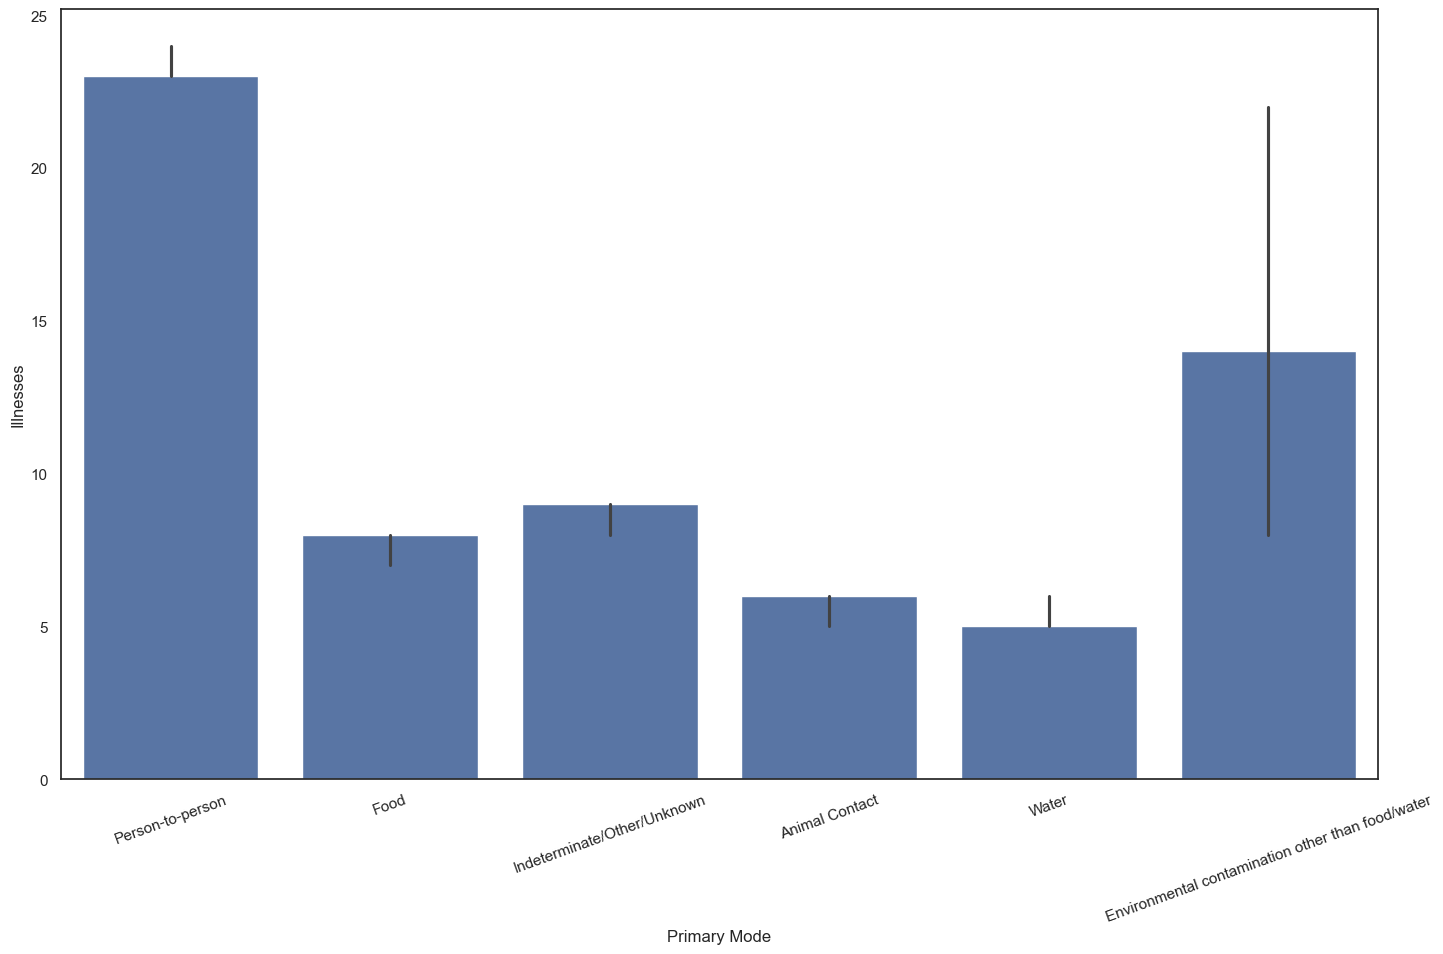

In [369]:
fig, ax = plt.subplots(figsize=(17, 10))
sns.set_style('white')
sns.barplot(data=original_df, x='Primary Mode', y='Illnesses', estimator='median', errorbar=('ci', 95))
plt.xticks(rotation=20)
plt.show()

In this case, we find that a plurality of illnesses are spread through person-to-person contact.  Another means of spreading for a large number of illnesses could be environmental contamination other than food and water, but there is significant variance in illnesses spread in this manner, suggesting the prescence of outliers or a small number os samples.  Note, the median is used in the above figure as the underlying distribution of illnesses follows an asymetric distribution, thus making the mean a poor measure of the number of illnesses spread through each mode.

**Part 2**

Group 1, Task A


For the remainder of the assignment, I will adopt the perspective of a recently hired Senior Data Scientist tasked with assisting government regulators in addressing and preventing foodborne disease outbreaks.

State regulators and public health officials have limited resources to direct towards foodborne illness prevention, so they have tasked me with finding the characteristics of disease outbreaks that account for a majority or plurality of foodborne illnesses in order to better direct their prevention efforts for the benefit of the public.

As a first step, I will modify the original data set to remove columns that contained excessive null values.  From the exploratory data analysis performed above, I know that the Year, Month, State, Primary Mode, and Illnesses columns do not contain any null values while the Setting, Hospitalizations, and Deaths columns contain < 15% null values.  All other columns will be dropped from the dataset. 

In [129]:
for name in original_df.columns:
    percent_null = (original_df[name].isnull().sum()/len(original_df))*100             
    if percent_null > 15.0:
        original_df = original_df.drop(name, axis=1)
    else: 
        pass

Additionally, based on earlier data analysis, data collection methods were expanded to include more modes of disease transmission, as well as the inclusion of data for multistate outbreaks, starting in 2009.  Thus including data before 2009 could lead to inaccurate conclusions.  Here, I will exclude all data collected before 2009.

In [131]:
df = original_df[original_df['Year']>=2009]

To visualize where public health officials should focus their efforts to reduce the number of foodborne illnesses, I began with the distribution of illnesses per outbreak display from the new, modified dataset.

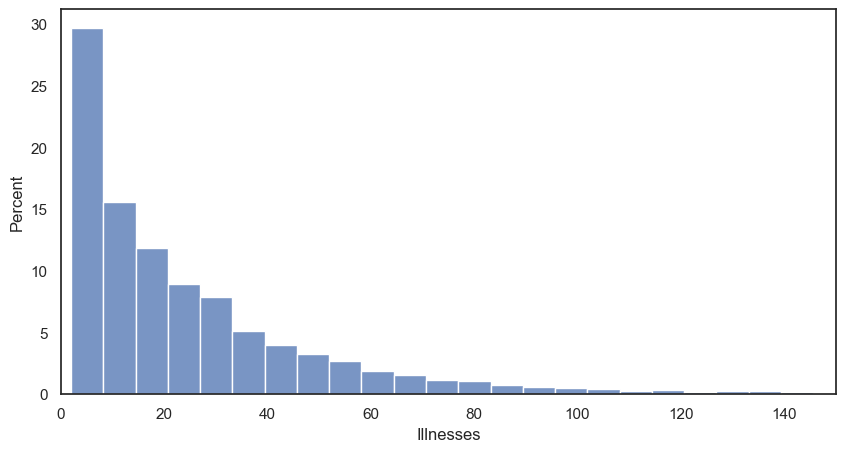

In [148]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.xlim(0, 150)
sns.histplot(data=df, x=df['Illnesses'], bins=400, stat='percent')
plt.show()

Despite the modifications made to the underlying data, the distribution of illnesses per outbreak remains asymetric, with a large number of outbreaks resulting in less than 10 illnesses while a relatively few number of outbreaks yield more than 50 or even 100 illnesses.

From a public health perspective, stopping the outbreaks that lead to higher numbers of illnesses should be a higher priority, as stopping just one of these outbreaks can impact many more people. But the question remains, what are the characteristics of outbreaks that lead to large numbers of illnesses?

To help answer this, I visualized the distribution of the number of illnesses in each outbreak that were transmitted by the 6 primary modes of spreading in a stacked histogram.  

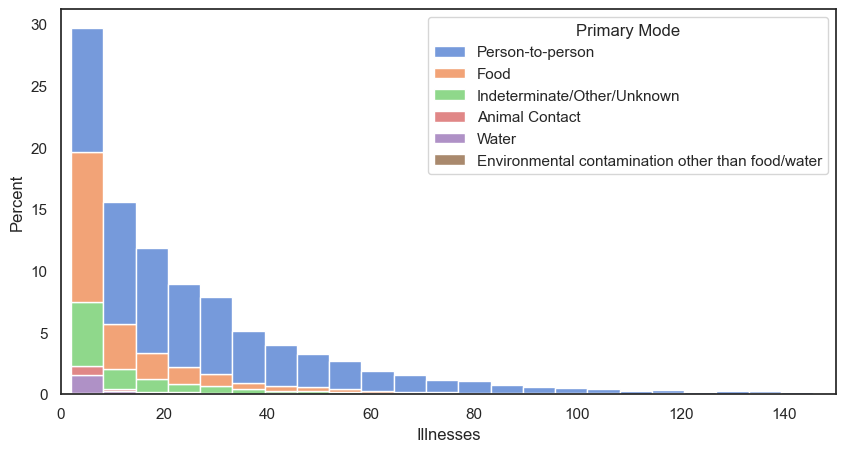

In [164]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.xlim(0, 150)
sns.histplot(data=df, x=df['Illnesses'],multiple='stack', palette='muted' ,  hue='Primary Mode', bins=400, stat='percent')
plt.show()

In this figure, the bin corresponding to outbreaks with the lowest number of illnesses contains a significant percent of multiple modes of transmission.  However, it is clear that outbreaks corresponding to high numbers of recorded illnesses are overwhelmingly spread by person-to-person contact.

One way to quantify the impact of person-to-person communicated disease would be to calculate the percent of outbreaks communicated via person-to-person that led to a number of illnesses higher than the median for the data set. Put another way, what percent of the most dangerous outbreaks were spread by person-to-person contact?


In [177]:
median_num_ill = np.median(df['Illnesses'])
high_ill_df = df[df['Illnesses']>median_num_ill]
round((len(high_ill_df[high_ill_df['Primary Mode']=='Person-to-person'])/len(large_ill_df))*100, 2)

79.48

Nearly 80% of foodborne illness outbreaks that yielded a number of illnesses higher than the median were spread by person-to-person contact.  Thus, to prevent the spread of disease, a public health official should monitor or prevent circumstances where person-to-person contact is likely, such as in restaurants or nursing homes.

But the mode of transmission was not the only column that revealed an interesting pattern during exploratory data analysis.  Another important finding was how the number of foodborne illnesses changed depending on the month of the year.  To confirm that the median number of foodborne illnesses per outbreak varies by month for data collected after 2009, I replicated the previous visualization with the modified data set.

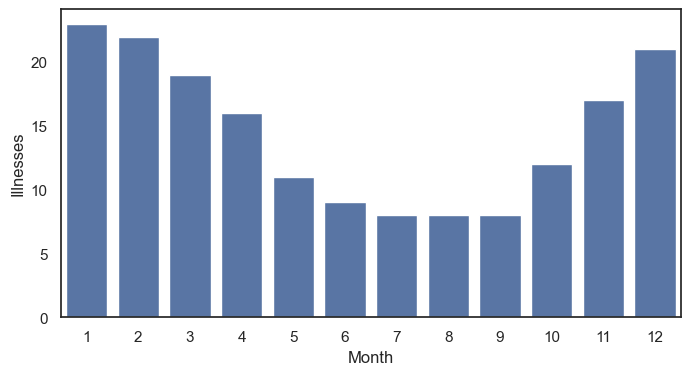

In [373]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=df.groupby(['Month']).median(numeric_only=True)['Illnesses'])
plt.show()

Based on this data, the median number of illnesses per outbreak occuring in January (Month 1) is over 3 times higher than those occuring in August (Month 8), with similar imbalances taking place throughout other months of the year.  Foodborne illness prevention efforts that are implemented during months with high numbers of illness would have a much larger impact on public health compared to similar measures implemented during other months.  To quantify this point, I compared the total number of foodborne illnesses during the 6 months with the lowest median number of illnesses to the 6 months with the highest total amount of illness.      

In [200]:
ill_jan_apr = df[(df['Month']<5)].groupby(['Month']).sum()['Illnesses'].sum()
ill_may_dec = df[(df['Month']>=5)].groupby(['Month']).sum()['Illnesses'].sum()
ill_nov_dec = df[(df['Month']>10)].groupby(['Month']).sum()['Illnesses'].sum()

In [212]:
low_ill_months = ill_may_dec - ill_nov_dec
high_ill_months = ill_jan_apr + ill_nov_dec
print('Total number of illnesses from May through October is:', low_ill_months)
print('Total number of illnesses from January through April and November through December is:', high_ill_months)

Total number of illnesses from May through October is: 183268
Total number of illnesses from January through April and November through December is: 721870


The difference in the number of illnesses during these time intervals is nearly a factor of 4, demonstrating a strong seasonal dependence in foodborne illness.  Considering that the majority of foodborne illnesses are transmitted via person to person contact, it is plausible that outbreaks with high levels of illness would occur during the winter and fall months where many people remain indoors more frequently.

As a summary of this analysis, I generated a heatmap to show the median number of illnesses in an outbreak depending on 1) the primary mode of communication and 2) the month in which the outbreak occurred.

In [241]:
illness_heatmap = pd.crosstab(df['Primary Mode'], df['Month'], values=df['Illnesses'], aggfunc='median')

<Axes: xlabel='Month', ylabel='Primary Mode'>

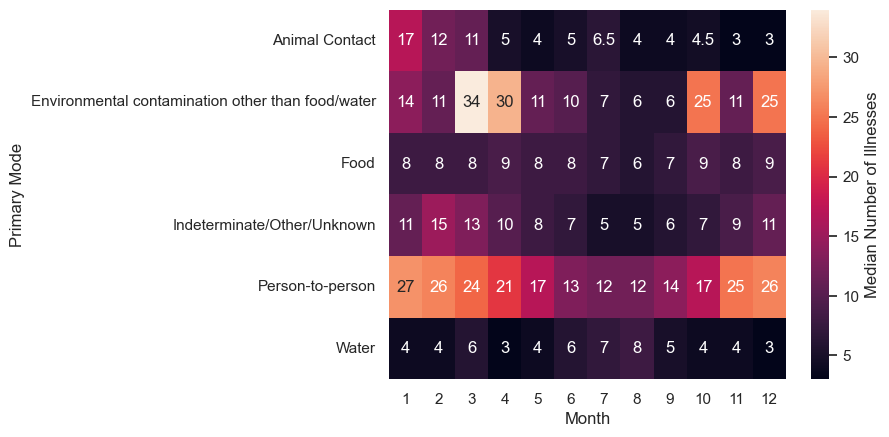

In [248]:
sns.heatmap(illness_heatmap, annot=True, cbar_kws={'label': 'Median Number of Illnesses'})

In this figure, two features stand out.  First, the large magnitude and seasonal dependence of illnesses transmitted through person-to-person contact is clearly visible.  Second, there are few months in which median illnesses due to "environmental contamination other than food/water" are much higher than average.  This can be explained by the fact that there are many fewer outbreaks of disease communicated through environmental contamination than by person-to-person contact.   

In [252]:
print('Number of person-to-person outbreaks:', len(df[df['Primary Mode'] == 'Person-to-person']))
print('Number of environmental contamination outbreaks:', len(df[df['Primary Mode'] == 'Environmental contamination other than food/water']))

Number of person-to-person outbreaks: 20534
Number of environmental contamination outbreaks: 94


Thus, the outbreaks with high median illnesses due to environmental contamination are statistical outliers rather than useful data points for setting public health policy.  Based on the analysis done here, I would recommend that public health resources be directed towards monitoring or preventing environments where person-to-person contact between large numbers of people is likely, especially during the fall and winter months.

**Part D**

Analyzing data related to foodborne illnesses in the provided dataset has led to several useful characteristics of disease outbreaks.  However, there has been no insights regarding what public health or state regulators have done or are doing to prevent further outbreaks.  Additionally, given the new insight that person-to-person communication is the most common form of disease transmission, an investigation into population density may lead to a useful conclusion.

In the last portion of this assignment, I will examine state population densities, per capita state public health spending, and the state level foodborne illness data provided.  The population densities used are from the US census, and data related to per person health care spending has been collected by the Commonwealth Fund, an organization dedicated to improving public health access in the United States.  Links to the associated data sets are shown below.

US Census Data: https://www.census.gov/data/tables/time-series/dec/density-data-text.html

Per Person Healthcare Spending Data: https://www.commonwealthfund.org/datacenter/public-health-funding

The goal is to find the state that has yielded the best foodborne illness outcomes for a given population density and public health spending.  More densely populated states have greater obstacles to prevent the transmission of disease, and thus likely have higher per capita health expenditures to compensate accordingly.

State budget data and census data exists for several years, but for the purposes of this exercise, I have chosen to use data for the most recent years in each category to provide a conclusion relevant to the present day.  State budget data and foodborne illness data are gathered from 2017, and state population density data is collected from the most recent census in 2020.

In this analysis, I begin by grouping the provided foodborne illness outbreak by State and collecting the median number of illnesses per outbreak per state in a new dataframe.

In [289]:
state_illness_df = df.groupby(['State']).median(numeric_only=True)['Illnesses']

Next I load the two additional data sets containing public health spending data and population density data, respectively.

In [374]:
health_spending_df = pd.read_csv('public-health-funding.csv')
pop_density_df = pd.read_csv('census_data.csv', thousands=',')

All imported datasets contain a "State" column, allowing us to merge all three data sets into one combined dataframe

In [375]:
combined_df = pd.merge(state_illness_df, health_spending_df, on='State', how='outer')

In [376]:
combined_df = pd.merge(combined_df, pop_density_df, on='State', how='outer')

In [377]:
combined_df.head(5)

,State,Illnesses,time_period,population,cohort,Spending per person,map_group,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,12.0,2016/17,all,All,57.19,Top Performing States,State,2020.0,5024279.0,5.1,99.2,29.0,7.0,0.0,718579.0
1,Alaska,6.0,2016/17,all,All,118.42,Top Performing States,State,2020.0,733391.0,3.3,1.3,52.0,1.0,0.0,736081.0
2,Arizona,15.0,2016/17,all,All,8.83,Bottom Performing States,State,2020.0,7151502.0,11.9,62.9,35.0,9.0,0.0,795436.0
3,Arkansas,6.0,2016/17,all,All,52.97,Top Performing States,State,2020.0,3011524.0,3.3,57.9,36.0,4.0,0.0,753439.0
4,California,7.0,2016/17,all,All,62.08,Top Performing States,State,2020.0,39538223.0,6.1,253.7,13.0,52.0,-1.0,761091.0


For the analysis done here, only four columns of data are needed:State, Illnesses, Spending per person, and Resident Population Density.  All other columns will be removed in a processing step.

In [378]:
combined_df.drop(['time_period', 'population', 'cohort', 'map_group', 'Geography Type', 'Year', 'Resident Population', 'Percent Change in Resident Population', 'Resident Population Density Rank', 'Number of Representatives', 'Change in Number of Representatives', 'Average Apportionment Population Per Representative'], axis=1, inplace=True)

In [379]:
combined_df.dropna(axis=0, how='any', inplace=True)

In [380]:
combined_df.head()

,State,Illnesses,Spending per person,Resident Population Density
0,Alabama,12.0,57.19,99.2
1,Alaska,6.0,118.42,1.3
2,Arizona,15.0,8.83,62.9
3,Arkansas,6.0,52.97,57.9
4,California,7.0,62.08,253.7


Next I needed a metric than incorporates the Illnesses, Spending per person, and Resident Population Density, data to find the state that has the lowest median number of illnesses per outbreak for a given population density and per capita public health spending.  

I created a new column that is populated with a new policy metric consisting of the following ratio for each state. 

$$\frac{Resident\,Population\, Density}{(Illnesses)(Spending\, per\, Person)}$$

The states that maximize this ratio will have enacted public health policies that lead to the lowest median number of illnesses per outbreak for a given population density and per capita spending.

In [381]:
combined_df['Policy Metric'] = combined_df['Resident Population Density'].astype(float)/(combined_df['Illnesses']*combined_df['Spending per person'])

In [1]:
combined_df.head()

NameError: name 'combined_df' is not defined

<Axes: xlabel='Policy Metric', ylabel='Count'>

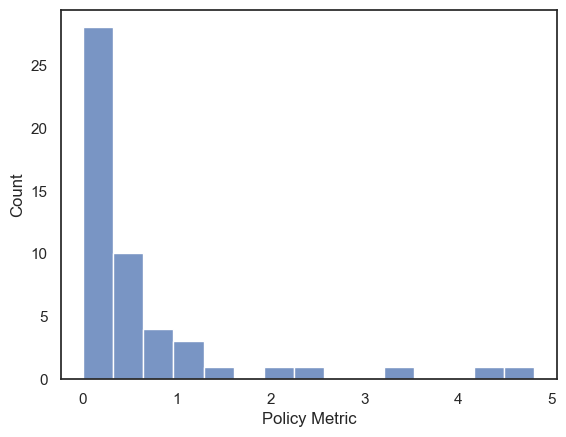

In [382]:
sns.histplot(combined_df['Policy Metric'])

In [383]:
combined_df[combined_df['Policy Metric']>2]['State']

8           Florida
19         Maryland
30       New Jersey
35             Ohio
49    Washington DC
Name: State, dtype: object

When plotted as a histogram, there are 5 states (Florida, Maryland, New Jersey, Ohio, and Washington DC) that have a Policy Metric clearly higher than the rest of the distribution.  These states have implemented policies that have led to a lower number of illnesses per foodborne disease outbreak when normalized to population density and per capita state health spending.  As I data scientist working with public health regulators, I would reccommend an investigation into the treatment of foodborne illnesses by these states in the year analyzed in order to find useable solutions to prevent future outbreaks with high numbers of illnesses. 

**Conclusion**

This concludes the requested analysis.  I have discovered the monthly dependence of foodborne illness outbreaks, as well as the fact that person-to-person contact is the most common mode of disease transmission.  Furthermore, I created a metric to find the states that balance population density and per capita health spending to yield a lower levels of illness per food outbreaks.  These states are Florida, Maryland, New Jersey, Ohio, and Washington DC.    

If this project were to continue, I would investigate the relationship between specific microbes and foodborne illnesses or deaths.  This was not done here since nearly 30% of the Etiology column of the original dataframe was populated by null values, but learning which type of microorganism resulted in worse public health outcomes would provide further direction for policy changes.   